**Nama : Andy Nugraha Putra<br>
Kelas : TI3E<br>
NIM : 2241720006**

## Praktikum 1 Klasifikasi SVM dengan Data Dummy



In [1]:
# Klasifikasi SVM dengan Data dummy

# Import liblary
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# numpy: Digunakan untuk operasi matematika pada array dan menghasilkan data.
# matplotlib.pyplot: Library untuk membuat grafik dan visualisasi.
# scipy.stats: Digunakan untuk berbagai fungsi statistik.
# seaborn: Digunakan untuk membuat visualisasi data yang lebih estetis.

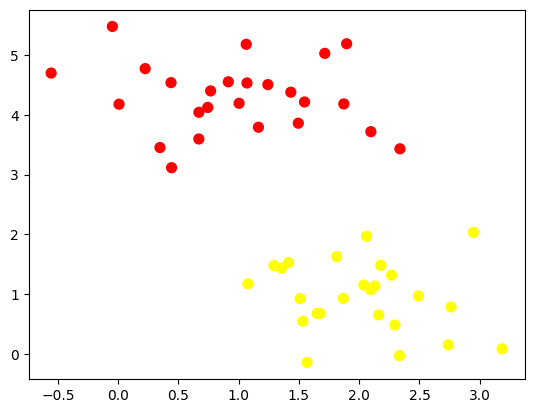

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# make_blobs(): Fungsi untuk menghasilkan dataset buatan dengan beberapa cluster.
# n_samples=50: Membuat 50 sampel data.
# centers=2: Menghasilkan 2 cluster sebagai target.
# random_state=0: Mengatur seed agar hasilnya konsisten.
# cluster_std=0.60: Menentukan deviasi standar dari cluster.

(-1.0, 3.5)

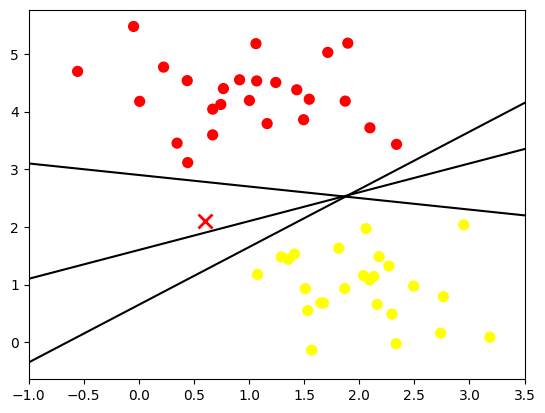

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

# Membuat scatter plot dari data X.
# X[:, 0]: Sumbu x dari data.
# X[:, 1]: Sumbu y dari data.
# c=y: Pewarnaan berdasarkan label.
# s=50: Ukuran marker.
# cmap='autumn': Warna ditetapkan dengan skema 'autumn'.

(-1.0, 3.5)

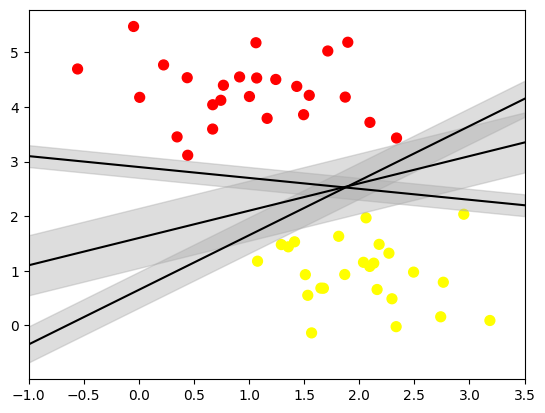

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

# xfit = np.linspace(-1, 3.5): Menghasilkan titik-titik x dari -1 hingga 3.5.
# plt.plot([0.6], [2.1], 'x', color='red'): Menampilkan tanda silang merah pada koordinat (0.6, 2.1).

# Iterasi untuk menggambar tiga garis linear dengan kemiringan m dan intercept b.
# Garis 1: Kemiringan = 1, intercept = 0.65.
# Garis 2: Kemiringan = 0.5, intercept = 1.6.
# Garis 3: Kemiringan = -0.2, intercept = 2.9.

# Menggambar garis yang sama seperti sebelumnya, tetapi kali ini menambahkan area abu-abu di sekitar garis untuk menunjukkan margin ketidakpastian atau toleransi:
# d: Jarak antara garis dan batas-batas toleransi di atas dan bawah garis.
# plt.fill_between(): Mengisi area antara dua batas di sekitar garis.

**Penerappan fitting SVM**

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# SVC(kernel='linear'): Membuat model Support Vector Classifier dengan kernel linear.
# Kernel linear berarti model memisahkan data menggunakan garis lurus.
# C=1E10: Parameter C yang sangat besar membuat model berusaha keras untuk tidak membiarkan kesalahan klasifikasi (penalty tinggi untuk salah klasifikasi).
# model.fit(X, y): Melatih model SVM dengan data X dan label y.

SVC(C=10000000000.0, kernel='linear')

In [6]:
SVC(C=10000000000.0, kernel='linear')

# SVC(C=1E10, kernel='linear'): Membuat model Support Vector Classifier (SVC) dengan kernel linear dan parameter C yang besar (1E10). Parameter C yang sangat besar membuat
# model lebih fokus pada klasifikasi sempurna, meminimalkan kesalahan klasifikasi.

SVC(C=10000000000.0, kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


# plot_svc_decision_function: Fungsi ini menampilkan decision boundary dari model SVM.
# xlim dan ylim: Mengambil batas sumbu x dan y dari plot.
# np.meshgrid(): Membuat grid 2D dari sumbu x dan y.
# model.decision_function(xy): Menghitung nilai decision function dari model pada grid (xy), yang digunakan untuk memplot batas dan margin dari SVM.
# ax.contour(): Menggambar batas (decision boundary) dan margin (-1 dan +1) dari SVM.
# model.support_vectors_: Menampilkan support vectors, yang adalah data poin yang paling relevan dalam menentukan batas keputusan.

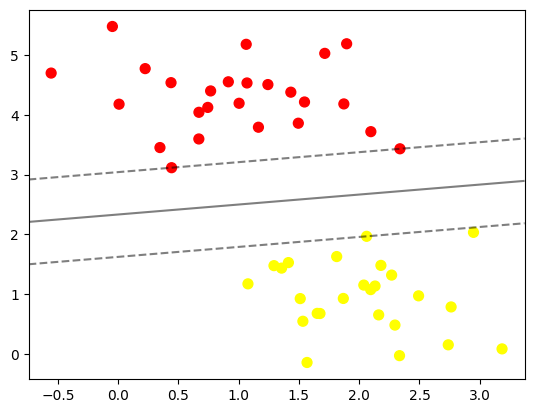

In [8]:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model)

#     plt.scatter(): Memvisualisasikan data dengan pewarnaan berdasarkan kelas (label y).
# plot_svc_decision_function(model): Memanggil fungsi untuk menampilkan decision boundary dari model.

In [9]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

# model.support_vectors_: Menampilkan array support vectors dari model SVM yang dilatih. Support vectors adalah titik data yang berada di dekat decision boundary dan berpengaruh dalam menentukan batas keputusan.

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

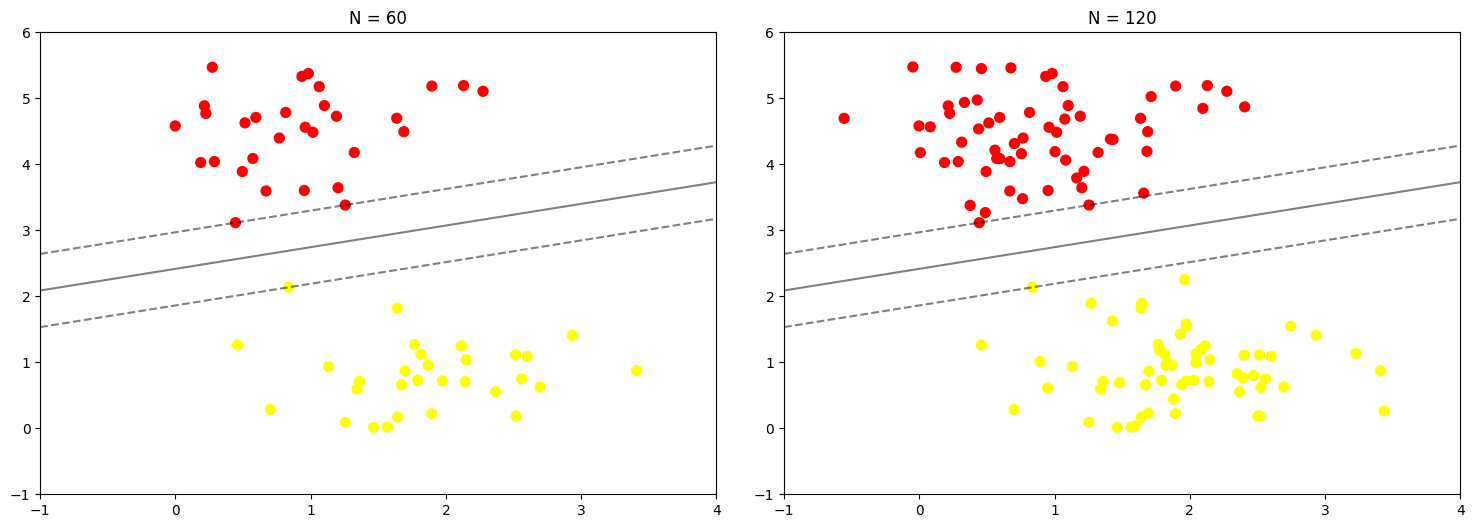

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#     plot_svm(): Fungsi untuk memplot SVM berdasarkan sejumlah N sampel dari dataset buatan.
# make_blobs(): Membuat dataset 2D dengan 200 sampel yang dibagi ke dalam 2 cluster.
# X = X[:N]: Mengambil N data poin pertama untuk plot.
# model.fit(X, y): Melatih model SVM dengan data yang dipotong.

# Membuat dua subplot dengan ukuran dataset N = 60 dan N = 120, masing-masing menunjukkan data dan decision boundary dari SVM.

**Data Tidak Terpisah Secara Linier**

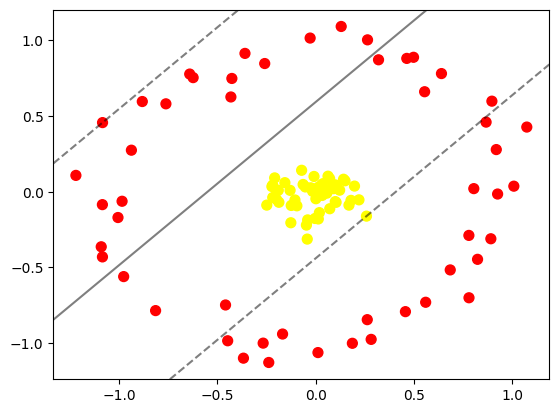

In [11]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


# make_circles(): Membuat dataset yang tidak terpisah secara linear (bentuk lingkaran).
# factor=.1: Menentukan ukuran lingkaran dalam.
# noise=.1: Menambahkan noise pada data.
# SVC(kernel='linear').fit(X, y): Mencoba memisahkan data yang tidak terpisah secara linear menggunakan SVM dengan kernel linear.
# plot_svc_decision_function(): Menampilkan batas keputusan (decision boundary) dari SVM.

In [12]:
r = np.exp(-(X ** 2).sum(1))

# r = np.exp(-(X ** 2).sum(1)): Menghitung nilai r dengan menggunakan fungsi eksponensial untuk setiap data di X. Fungsi ini merupakan salah satu teknik transformasi yang sering digunakan untuk
#  merubah data ke dalam bentuk non-linear, yang kemudian akan dimanfaatkan dalam visualisasi 3D dan pemisahan non-linear oleh SVM.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=None, y=None)>

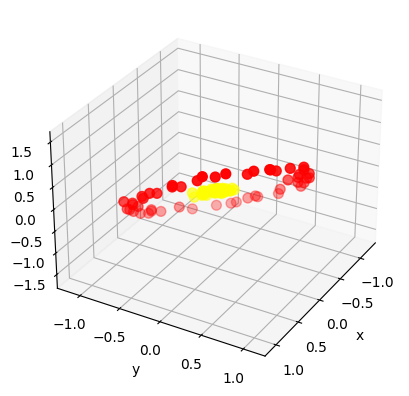

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=None, y=None):
    ax = plt.subplot(projection='3d')
    r = X[:, 0] + X[:, 1]  # Example, modify according to your needs
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))


# mpl_toolkits.mplot3d.Axes3D: Modul dari matplotlib yang digunakan untuk membuat visualisasi 3D.
# ipywidgets.interact: Memungkinkan interaksi dengan plot, seperti mengubah sudut pandang (elevation dan azimuth).
# plot_3D(): Fungsi untuk memplot data dalam bentuk 3D, di mana sumbu z diwakili oleh hasil transformasi linear sederhana r = X[:, 0] + X[:, 1].
# elev: Sudut elevasi kamera 3D.
# azim: Sudut azimuth (horizontal) kamera 3D.
# interact(): Membuat plot interaktif yang memungkinkan pengguna mengubah nilai elevasi dan azimuth secara real-time.


In [14]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

# SVC(kernel='rbf', C=1E6): Membuat model Support Vector Classifier (SVC) dengan kernel RBF (Radial Basis Function). Kernel RBF memungkinkan SVM untuk memisahkan data yang tidak terpisah secara linear dengan memetakan data ke dimensi yang lebih tinggi.
# C=1E6: Parameter regularisasi yang sangat besar, membuat model meminimalkan kesalahan klasifikasi.

SVC(C=1000000.0)

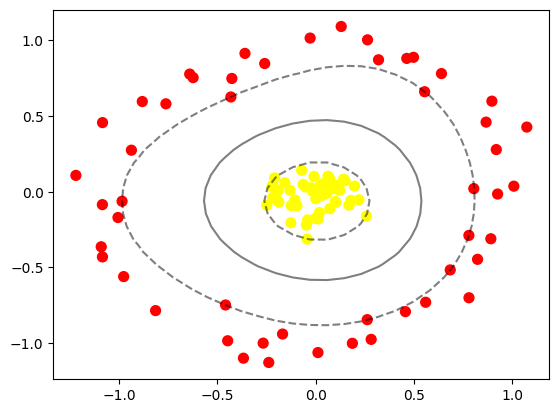

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# plt.scatter(): Memvisualisasikan data X dengan pewarnaan berdasarkan label y.
# plot_svc_decision_function(clf): Memvisualisasikan decision boundary dari model RBF SVM yang dilatih.
# plt.scatter(clf.support_vectors_): Memvisualisasikan support vectors dari model RBF SVM.

**Data Overlap**

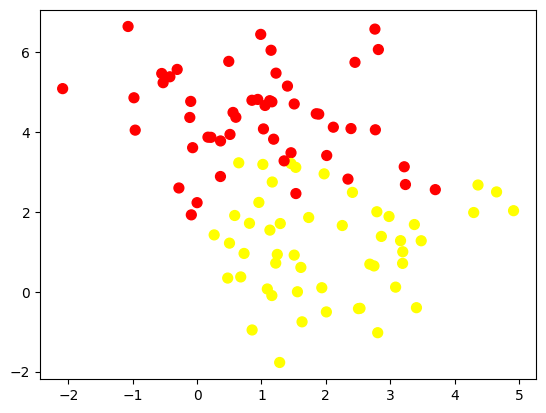

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

# make_blobs(): Membuat dataset buatan 2D dengan 100 sampel dan 2 cluster. cluster_std=1.2 menentukan seberapa jauh sampel dari masing-masing cluster.

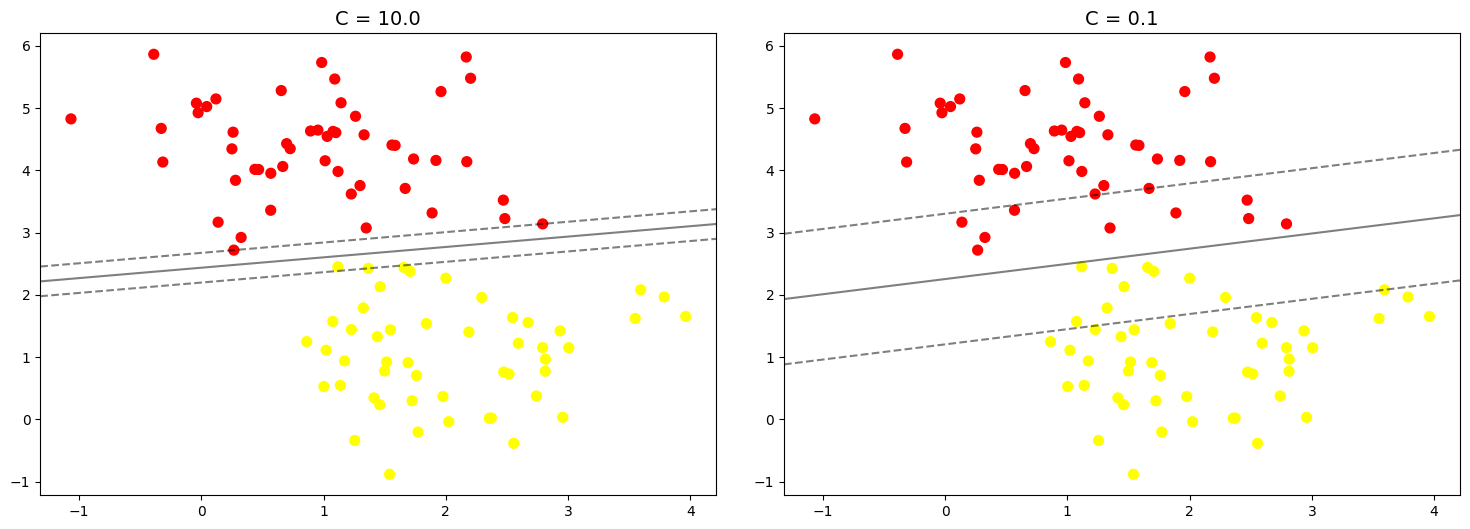

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

#     for axi, C in zip(ax, [10.0, 0.1]): Membandingkan dua model SVM dengan kernel linear tetapi dengan dua nilai parameter C yang berbeda.
# C = 10.0: Model sangat ketat terhadap kesalahan klasifikasi.
# C = 0.1: Model lebih lunak terhadap kesalahan klasifikasi.
# SVC(kernel='linear', C=C): Membuat dua model SVM linear dengan nilai C yang berbeda.
# plot_svc_decision_function(model, axi): Menampilkan decision boundary dari masing-masing model.

# Praktikum 2 Klasifikasi SVM Pada Data Citra



In [18]:
# Klasifikasi SVM Pada Data Citra
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

# fetch_lfw_people(): Mengambil dataset LFW yang berisi gambar wajah orang-orang terkenal. Parameter min_faces_per_person=60 berarti hanya akan mengambil gambar dari orang-orang yang memiliki setidaknya 60 gambar.
# faces.target_names: Menampilkan nama orang dalam dataset.
# faces.images.shape: Menampilkan bentuk dari gambar (jumlah gambar, tinggi, lebar).

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


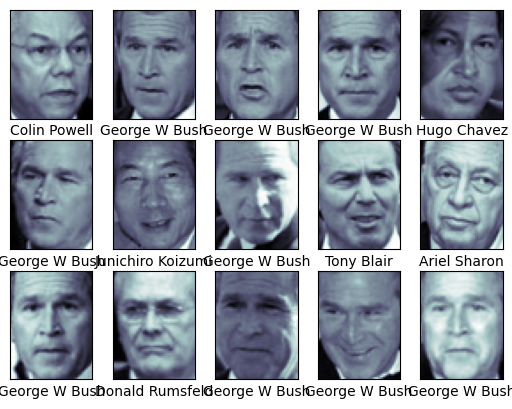

In [19]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#     plt.subplots(3, 5): Membuat grid 3x5 untuk menampilkan 15 gambar.
# ax.flat: Menggunakan iterator untuk mengakses setiap subplot.
# axi.imshow(faces.images[i], cmap='bone'): Menampilkan setiap gambar wajah dengan skema warna abu-abu.
# xlabel: Menampilkan nama orang yang sesuai dengan gambar.

In [20]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# RandomizedPCA(n_components=150): Menggunakan PCA untuk mengurangi dimensi dari gambar wajah. Hanya 150 komponen utama yang dipilih, yang merupakan fitur terpenting dari gambar.
# whiten=True: Menormalkan komponen PCA, sehingga membuat distribusi data lebih cocok untuk digunakan oleh SVM.
# SVC(kernel='rbf', class_weight='balanced'): Membuat model SVM dengan kernel RBF (Radial Basis Function) untuk klasifikasi non-linear, dan class_weight='balanced' untuk menangani kelas yang tidak seimbang.
# make_pipeline(pca, svc): Membuat pipeline yang pertama-tama menerapkan PCA, kemudian menjalankan SVM.

In [21]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

# train_test_split(): Membagi data wajah menjadi set latih (train) dan set uji (test), menggunakan 75% untuk pelatihan dan 25% untuk pengujian.
# faces.data: Data gambar wajah dalam bentuk array datar (2D).
# faces.target: Label orang yang sesuai dengan gambar.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

# param_grid: Dictionary yang berisi nilai parameter C dan gamma untuk diuji.
# C: Parameter regularisasi yang mengontrol batas margin. Nilai yang lebih besar menghasilkan model yang lebih ketat.
# gamma: Parameter kernel RBF yang mengontrol jarak pengaruh dari satu sampel data. Nilai yang lebih kecil menyebabkan distribusi pengaruh yang lebih lebar.
# GridSearchCV(): Menggunakan pencarian grid untuk menemukan kombinasi parameter terbaik dari SVM.
# grid.fit(Xtrain, ytrain): Melatih model menggunakan pencarian grid di atas data latih.
# grid.best_params_: Menampilkan kombinasi parameter terbaik dari grid search.
# grid.best_score_: Menampilkan skor terbaik yang dicapai model pada set pelatihan.

CPU times: user 1min 38s, sys: 26.8 s, total: 2min 5s
Wall time: 1min 16s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


**prediksi label untuk data testing**

In [23]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

# grid.best_estimator_: Mengambil model SVM terbaik (dengan parameter optimal) yang ditemukan oleh GridSearchCV.
# model.predict(Xtest): Melakukan prediksi terhadap data uji Xtest menggunakan model SVM yang sudah dilatih. Hasil prediksi disimpan di variabel yfit.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

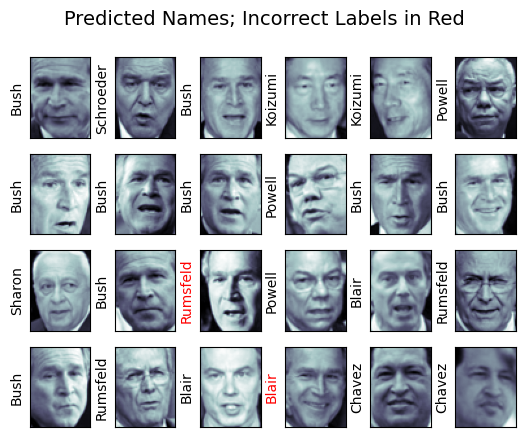

In [24]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

# plt.subplots(4, 6): Membuat grid 4x6 untuk menampilkan 24 gambar dari set uji.
# Xtest[i].reshape(62, 47): Mengembalikan data gambar dari bentuk 1D (data array datar) menjadi bentuk aslinya, yaitu ukuran 62x47 piksel (dimensi gambar wajah).
# axi.set_ylabel(faces.target_names[yfit[i]]...): Menampilkan nama yang diprediksi pada setiap gambar.
# Jika prediksi benar (yfit[i] == ytest[i]), label akan berwarna hitam.
# Jika prediksi salah, label akan berwarna merah untuk membedakan mana prediksi yang salah.
# fig.suptitle(): Menambahkan judul utama pada visualisasi yang menyatakan bahwa label yang salah diberi warna merah.

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

# classification_report(): Menampilkan laporan klasifikasi yang mencakup beberapa metrik evaluasi:
# Precision: Ketepatan dari prediksi model.
# Recall: Kemampuan model untuk menemukan semua sampel kelas tertentu.
# F1-score: Rata-rata harmonik dari precision dan recall.
# Support: Jumlah sampel di setiap kelas.

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

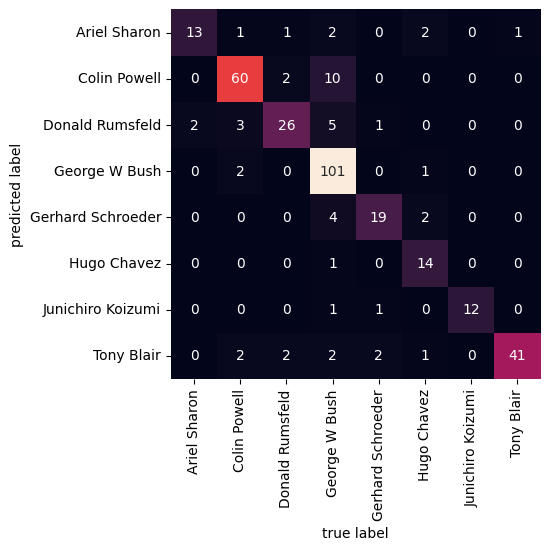

In [26]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# confusion_matrix(ytest, yfit): Menghasilkan matriks kebingungan, yang menunjukkan seberapa sering model salah mengklasifikasikan satu kelas sebagai kelas lain. Baris matriks menunjukkan label sebenarnya, sedangkan kolom menunjukkan label yang diprediksi.
# sns.heatmap(): Menggunakan Seaborn untuk membuat heatmap dari matriks kebingungan dengan anotasi angka pada setiap kotak.
# xticklabels dan yticklabels: Menyertakan nama target (nama orang) di sumbu x (label sebenarnya) dan y (label yang diprediksi).
# cbar=False: Menghilangkan bilah warna (color bar) untuk tampilan yang lebih sederhana.
# mat.T: Matriks ditransposkan untuk memudahkan visualisasi, sehingga label asli berada di sumbu x dan prediksi di sumbu y.
# Hasil dari heatmap ini akan memudahkan untuk melihat di mana prediksi model salah dan seberapa sering setiap kesalahan terjadi.


# Praktikum 3 Klasifikasi Naive Bayes dengan Data Dummy




In [27]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[126 110]
 [119 188]
 [ 12 191]
 [112 162]
 [188 408]
 [ 21 268]
 [ 86 248]
 [188 291]
 [ 75 124]
 [ 40 148]
 [172  85]
 [ 66  50]
 [110  95]
 [130  78]
 [ 89  25]
 [ 28  94]
 [117  84]
 [158  38]
 [ 78  98]
 [ 90 135]
 [ 43 181]
 [ 71 112]
 [ 99 125]
 [293 113]
 [ 79 280]
 [120  81]
 [145 189]
 [172  17]
 [ 25  48]
 [ 17 108]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [28]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,126,110,0
1,119,188,0
2,12,191,0
3,112,162,0
4,188,408,0


In [29]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,126,110,Kelas B
1,119,188,Kelas B
2,12,191,Kelas B
3,112,162,Kelas B
4,188,408,Kelas B


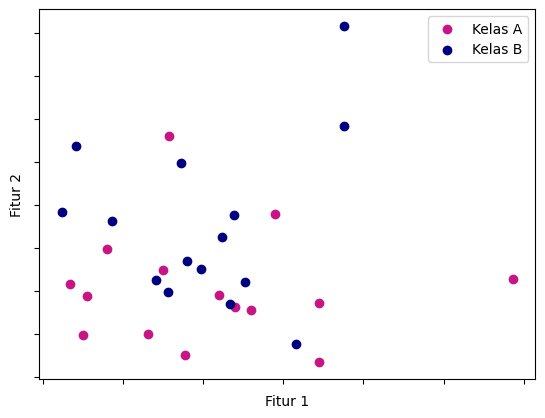

In [30]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [31]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8095238095238095
Hasil akurasi data test: 0.3333333333333333


In [32]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.8095238095238095
Hasil akurasi data test (Gaussian): 0.6666666666666666


# Praktikum 4 Klasifikasi Naive Bayes Pada Data Multinomial

In [35]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

In [36]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Labels      5572 non-null   object
 1   SMS         5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


       Labels                     SMS  \
count    5572                    5572   
unique      2                    5169   
top       ham  Sorry, I'll call later   
freq     4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                  

In [38]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [39]:
X = df['SMS'].values
y = df['Labels'].values

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)


In [41]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

# get_feature_names_out(): Mengembalikan daftar fitur (kata unik) dalam Bag of Words.

7727
Dimensi data: (4457, 7727)


In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# Praktikum 5 Klasifikasi Citra Siang dan Malam

In [43]:
# Langkah 0 - Import Library

# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [44]:
!unzip images.zip

Archive:  images.zip
   creating: images/
  inflating: __MACOSX/._images       
   creating: images/test/
  inflating: __MACOSX/images/._test  
   creating: images/training/
  inflating: __MACOSX/images/._training  
   creating: images/test/day/
  inflating: __MACOSX/images/test/._day  
   creating: images/test/night/
  inflating: __MACOSX/images/test/._night  
   creating: images/training/day/
  inflating: __MACOSX/images/training/._day  
   creating: images/training/night/
  inflating: __MACOSX/images/training/._night  
  inflating: images/test/day/20151102_122322.jpg  
  inflating: __MACOSX/images/test/day/._20151102_122322.jpg  
  inflating: images/test/day/20151101_235039.jpg  
  inflating: __MACOSX/images/test/day/._20151101_235039.jpg  
  inflating: images/test/day/20151102_114041.jpg  
  inflating: __MACOSX/images/test/day/._20151102_114041.jpg  
  inflating: images/test/day/20151102_074010.jpg  
  inflating: __MACOSX/images/test/day/._20151102_074010.jpg  
  inflating: images/

In [45]:

# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

In [46]:
# Langkah 1 - Load Data dan Visualisasikan

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [47]:
# Load training data
train_img = load_dataset(train_dir)

In [48]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 54,  36,  24],
         [ 54,  36,  24],
         [ 54,  36,  24],
         ...,
         [ 65,  43,  29],
         [ 65,  43,  29],
         [ 65,  43,  29]],
 
        [[ 54,  36,  24],
         [ 54,  36,  24],
         [ 54,  36,  24],
         ...,
         [ 65,  43,  29],
         [ 65,  43,  29],
         [ 65,  43,  29]],
 
        [[ 54,  36,  24],
         [ 54,  36,  24],
         [ 54,  36,  24],
         ...,
         [ 65,  43,  29],
         [ 65,  43,  29],
         [ 65,  43,  29]],
 
        ...,
 
        [[184, 106,  68],
         [156,  87,  46],
         [144,  90,  44],
         ...,
         [119,  65,  21],
         [119,  65,  21],
         [119,  65,  21]],
 
        [[154,  81,  48],
         [206, 142, 106],
         [155, 106,  65],
         ...,
         [114,  61,  19],
         [115,  62,  20],
         [116,  63,  21]],
 
        [[171, 102,  71],
         [255, 198, 164],
         [226, 178, 140],
         ...,
         [114,  61,  19],
  

In [49]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 59
(555, 800, 3)


In [50]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (889, 1280, 3)
Label	: night


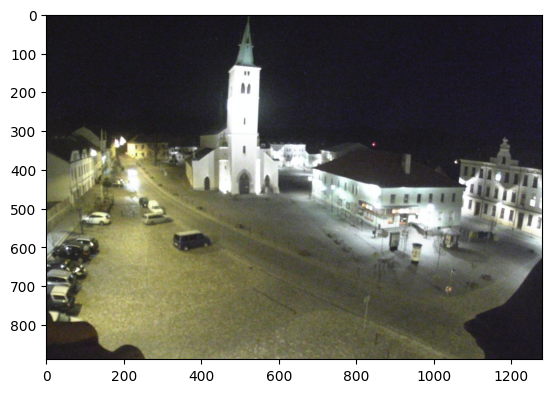

In [53]:
random_img_viz(train_img)

In [52]:
# Langkah 3 - Pra Pengolahan Data


def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [51]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [54]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [55]:
train_std_img_list = preprocess(train_img)

In [56]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 111
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


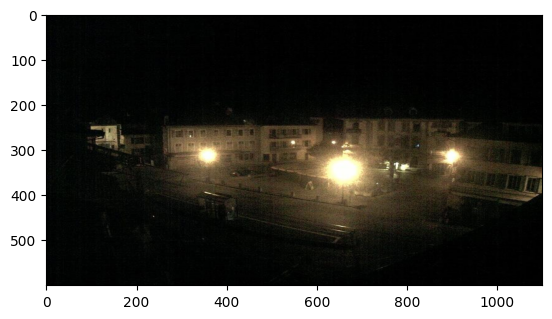

In [57]:
random_img_viz(train_std_img_list)

In [58]:
# Langkah 4 - Ekstraksi Fitur


# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 9
Avg Brighness: 119.6032


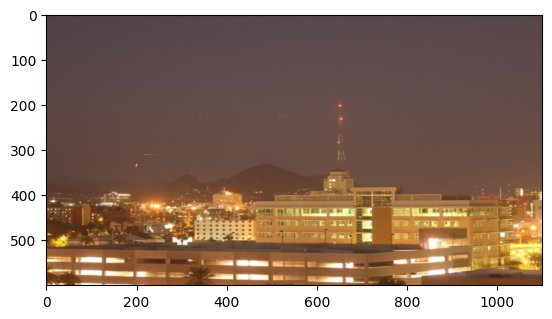

In [59]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [61]:
# Langkah 5 - Klasifikasi dengan Metode Threshold


def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 145
Actual label: 1
Predicted label: 1


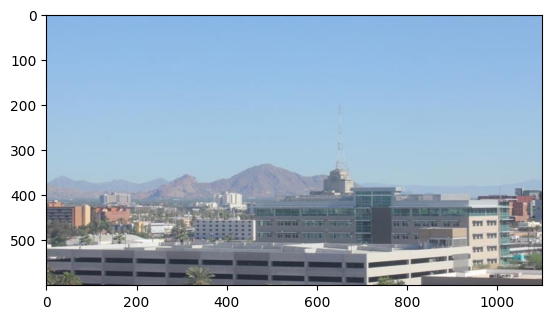

In [62]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [63]:
# Langkah 6 - Evaluasi (Manual)


def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [64]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [65]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [66]:
# Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

# Langkah 4 alternatif - Membuat Feature Vectors


# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [67]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,113.001189,0.0
1,13.750727,0.0
2,99.623588,0.0
3,36.167309,0.0
4,93.734889,0.0


In [68]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,13.228938,0.0
1,92.665621,0.0
2,56.674038,0.0
3,86.462873,0.0
4,32.609429,0.0


In [69]:
# Langkah 5 alternatif


# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [70]:
# Langkah 6 alternatif


from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# Tugas 1 (Opsional)

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [71]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [72]:
dt = pd.read_csv('voice.csv')
dt.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [73]:
# Membagi data menjadi fitur (X) dan target (y)
X = dt.iloc[:, :-1]
y = dt.iloc[:, -1]

# Mengkodekan label target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Skala fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Membuat Model SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [76]:
# Melakukan prediksi pada set pengujian
y_pred = svm_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Menampilkan laporan klasifikasi
class_report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", class_report)

Akurasi: 0.9763406940063092
Confusion Matrix:
 [[293   4]
 [ 11 326]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan


*   Menggunakan data spam.csv

*  Fitur CountVectorizer dengan mengaktifkan stop_words

*  Evaluasi hasilnya



In [77]:
dt.shape
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
data = pd.read_csv("spam.csv", encoding='latin-1')

# Memisahkan fitur (X) dan target (y)
X = data['v2']  # Kolom 'v2' berisi teks pesan
y = data['v1']  # Kolom 'v1' berisi label (spam atau bukan)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat CountVectorizer dengan stop_words
vectorizer = CountVectorizer(stop_words='english')

# Mengonversi teks pesan menjadi vektor fitur
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Membuat model Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = nb_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Menampilkan laporan klasifikasi
class_report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", class_report)

Akurasi: 0.9838565022421525
Confusion Matrix:
 [[959   6]
 [ 12 138]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan



*   Menggunakan data spam.csv

* Fitur TF-IDF dengan mengaktifkan stop_words

* Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

* Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv



In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
data = pd.read_csv("spam.csv", encoding='latin-1')

# Memisahkan fitur (X) dan target (y)
X = data['v2']  # Kolom 'v2' berisi teks pesan
y = data['v1']  # Kolom 'v1' berisi label (spam atau bukan)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat TfidfVectorizer dengan stop_words
vectorizer = TfidfVectorizer(stop_words='english')

# Mengonversi teks pesan menjadi vektor fitur TF-IDF
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Membuat model Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = nb_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi dengan TF-IDF:", accuracy)

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix dengan TF-IDF:\n", conf_matrix)

# Menampilkan laporan klasifikasi
class_report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi dengan TF-IDF:\n", class_report)

Akurasi dengan TF-IDF: 0.9668161434977578
Confusion Matrix dengan TF-IDF:
 [[965   0]
 [ 37 113]]
Laporan Klasifikasi dengan TF-IDF:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [80]:
# Import required libraries for classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Function to extract histogram features
def extract_histogram_features(img_list, bins=256):
    histograms = []
    labels = []

    for img, label in img_list:
        # Convert image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Calculate histogram
        hist = cv2.calcHist([gray_img], [0], None, [bins], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()  # Flatten to create feature vector

        histograms.append(hist)
        labels.append(label)

    # Return as numpy array
    return np.array(histograms), np.array(labels)

# Extract histogram features from training data
X_train_hist, y_train = extract_histogram_features(train_img)

# Encode the labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Split the data into training and test sets
X_train, X_val, y_train_split, y_val_split = train_test_split(X_train_hist, y_train_encoded, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train_split)

# Predict on validation data
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val_split, y_pred)
print("Akurasi SVM:", accuracy)

# Display classification report
class_report = classification_report(y_val_split, y_pred)
print("Laporan Klasifikasi:\n", class_report)


Akurasi SVM: 0.9791666666666666
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        24

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48

